In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error


## Obtaining the Data

Source: Downloaded from [Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: xlabel='median_income', ylabel='median_house_value'>

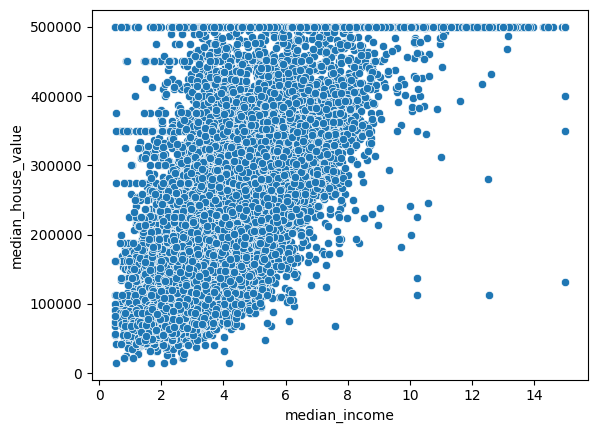

In [4]:
sns.scatterplot(x="median_income", y="median_house_value", data=housing)

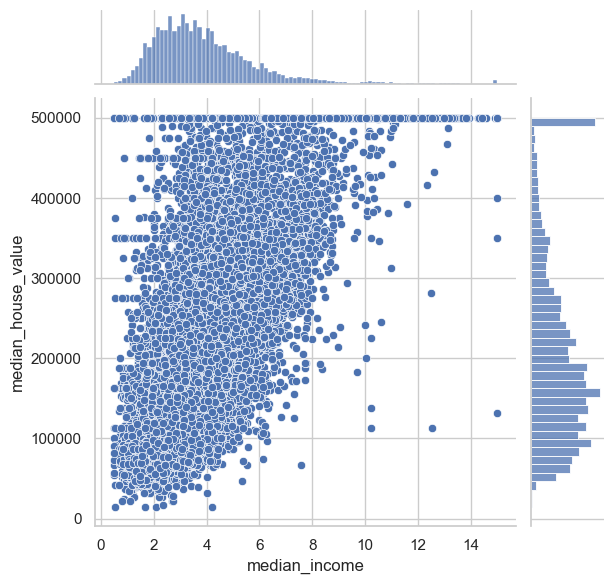

In [5]:
# using seaborn scatter plot, plot the median_house_value vs median_income

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=housing)

<Axes: xlabel='population', ylabel='median_house_value'>

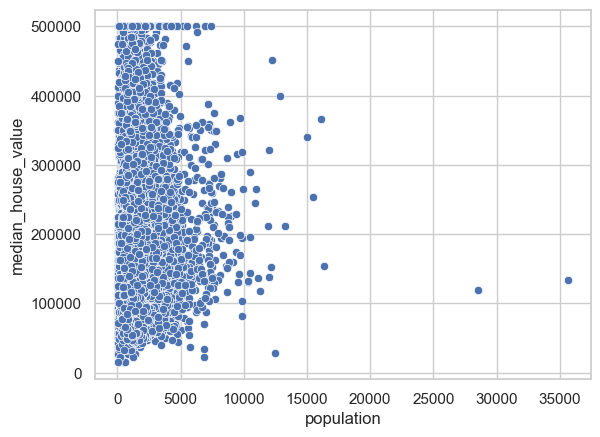

In [6]:
sns.scatterplot(x="population", y="median_house_value", data=housing)

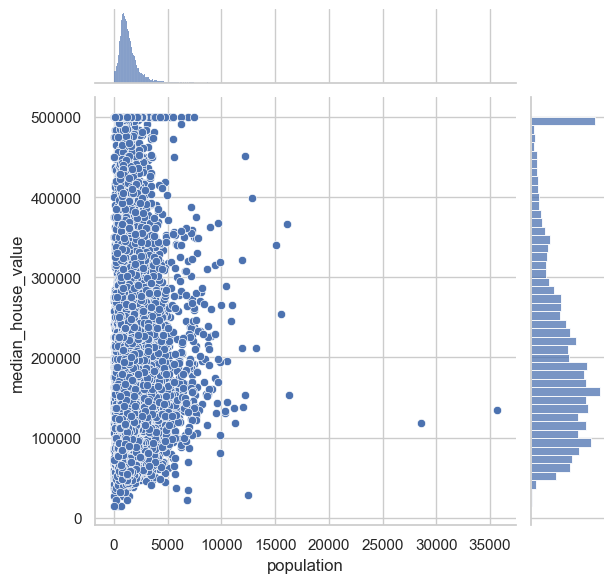

In [7]:
# using seaborn scatter plot, plot the median_house_value vs median_income

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="population", y="median_house_value", data=housing)

<Axes: xlabel='households', ylabel='median_house_value'>

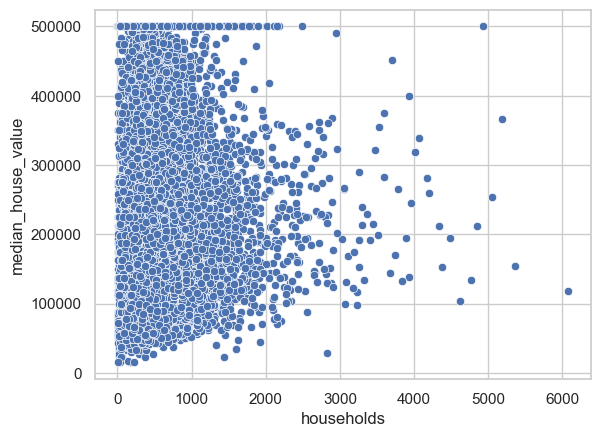

In [8]:
sns.scatterplot(x="households", y="median_house_value", data=housing)

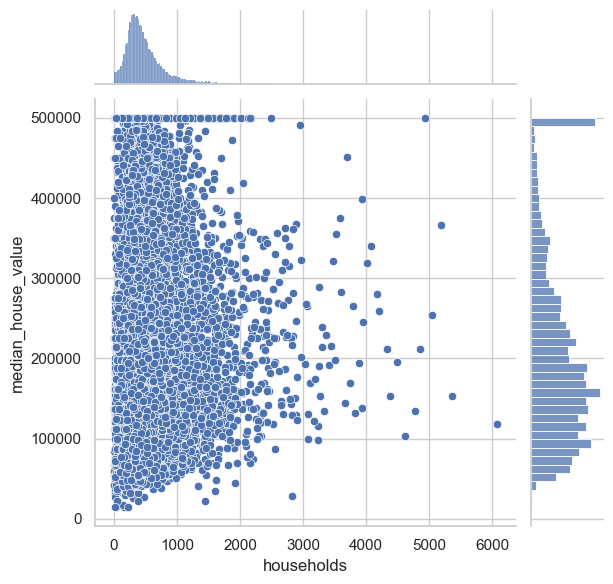

In [9]:
# using seaborn scatter plot, plot the median_house_value vs median_income

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="households", y="median_house_value", data=housing)

# Data Preprocessing

Filter out records with median_house_value = 500001 since it seems to be a cap for the median_house_value.

In [10]:
housing_preprocessed = housing[housing.median_house_value != 500001]

In [11]:
print(f"After filtering, there are {len(housing_preprocessed)} records, versus {len(housing)} before filtering")

After filtering, there are 19675 records, versus 20640 before filtering


Let's plot the same jointplot one more time to visualize the difference.

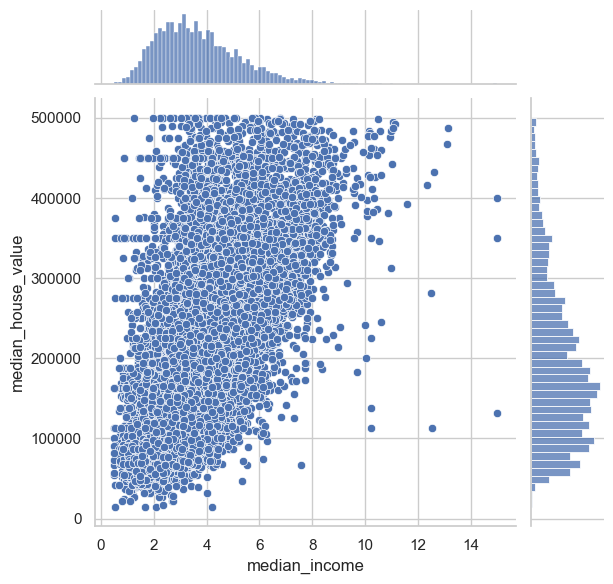

In [12]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="median_income", y="median_house_value", data=housing_preprocessed)

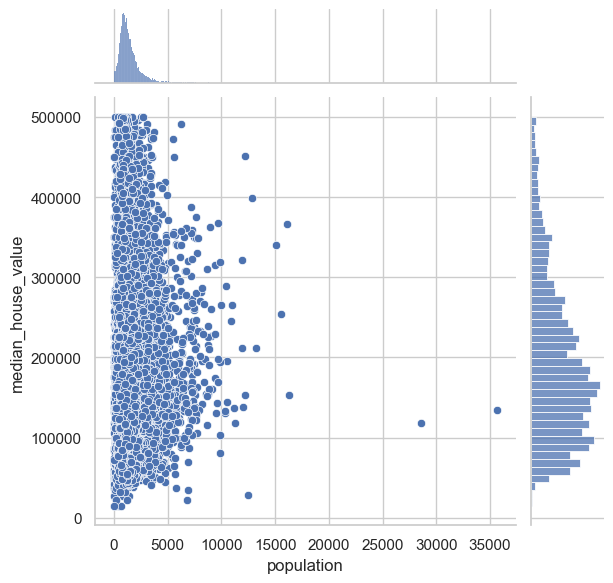

In [13]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="population", y="median_house_value", data=housing_preprocessed)

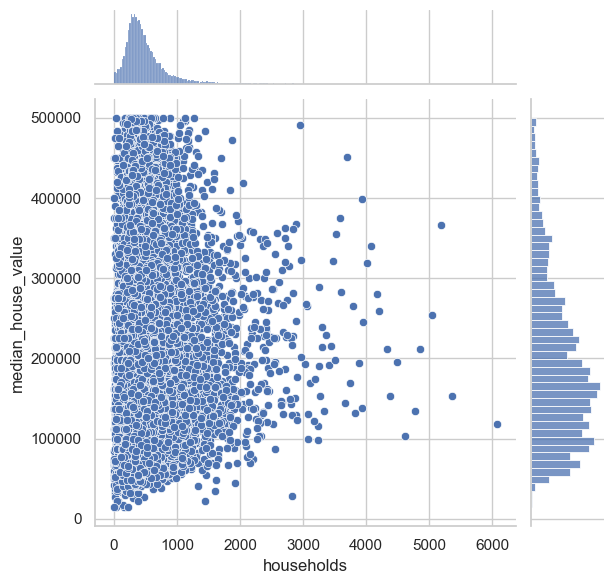

In [14]:
sns.set(style="whitegrid", color_codes=True)
sns.jointplot(x="households", y="median_house_value", data=housing_preprocessed)


# Train and Test Split

Split the data into training/testing sets. 
Use the first 80% of the data for training.

In [15]:
train_size = int(len(housing_preprocessed) * 0.8)
train = housing_preprocessed[:train_size]
test = housing_preprocessed[train_size:]

Scatter plot, train in blue and test in red in the same plot

<Axes: xlabel='median_income', ylabel='median_house_value'>

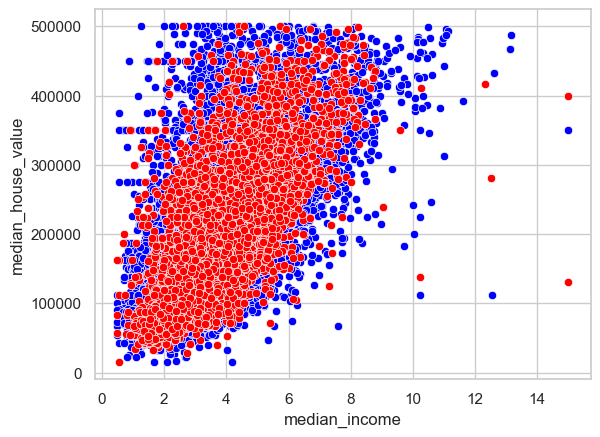

In [16]:
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red")

<Axes: xlabel='population', ylabel='median_house_value'>

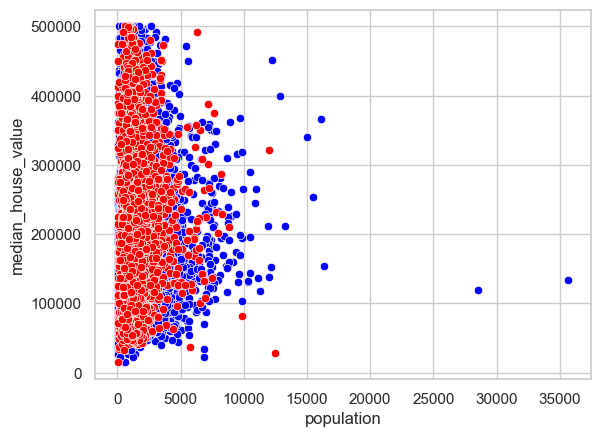

In [17]:
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="population", y="median_house_value", data=test, color="red")

<Axes: xlabel='households', ylabel='median_house_value'>

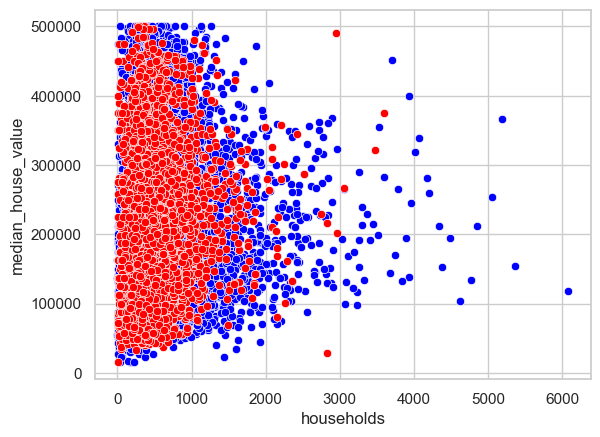

In [18]:
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue")
sns.scatterplot(x="households", y="median_house_value", data=test, color="red")

# Define a Model

Create a linear regression object

In [19]:
model = linear_model.LinearRegression()

# Train the Model --> Median income and Median house value

- Trainning the model with train Data

In [20]:
# fit
model.fit(X=train[["median_income"]], y=train[["median_house_value"]])

LinearRegression()

## Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Plot the regression line on top of the scatter plot of the training data and  Mean Squared Error (MSE) and the Mean Absolute Error (MAE)

In [21]:
# print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [48204.53436817]
Coefficients: [[38702.97233842]]


In [22]:
12*model.coef_ + model.intercept_

array([[512640.20242925]])

In [23]:
model.predict(X=[[12],[1],[100]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 512640.20242925],
       [  86907.50670659],
       [3918501.76821054]])

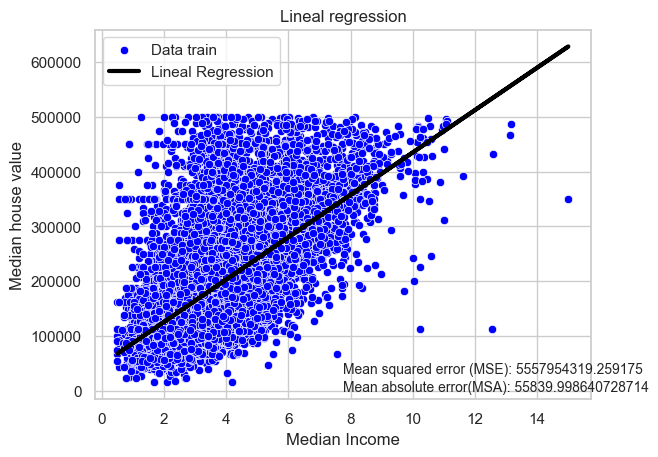

In [24]:

# plot the regression line against the training data
sns.scatterplot(x="median_income", y="median_house_value", data=train, color="blue", label='Data train')
plt.plot(train[["median_income"]], model.predict(train[["median_income"]]), color="black", linewidth=3, label='Lineal Regression')
plt.xlabel('Median Income')
plt.ylabel('Median house value')
plt.title('Lineal regression')

# Calculate MSE and MAE on the train set
textstr_mse =f"Mean squared error (MSE): {mean_squared_error(train[['median_house_value']], model.predict(train[['median_income']]))}"
plt.text(0.5, 0.10, textstr_mse, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

textstr_mae =f"Mean absolute error(MSA): {mean_absolute_error(train[['median_house_value']], model.predict(train[['median_income']]))}"
plt.text(0.5, 0.05, textstr_mae, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

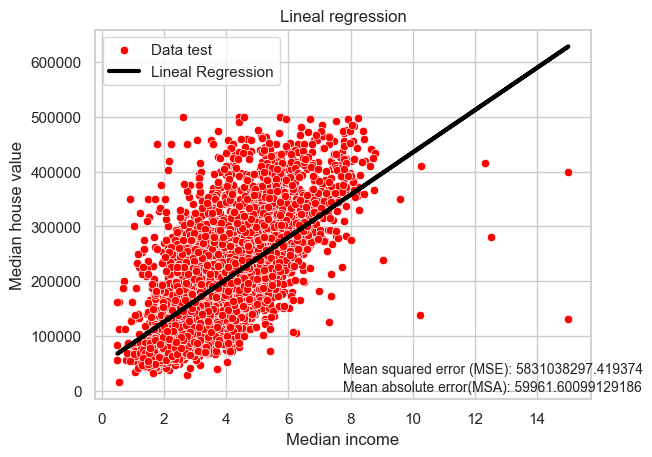

In [25]:
# plot the regression line against the test data
sns.scatterplot(x="median_income", y="median_house_value", data=test, color="red" , label='Data test')
plt.plot(test[["median_income"]], model.predict(test[["median_income"]]), color="black", linewidth=3, label='Lineal Regression')

plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.title('Lineal regression')

# Calculate MSE and MAE on the TEST set
textstr_mse =f"Mean squared error (MSE): {mean_squared_error(test[['median_house_value']], model.predict(test[['median_income']]))}"
plt.text(0.5, 0.10, textstr_mse, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

textstr_mae =f"Mean absolute error(MSA): {mean_absolute_error(test[['median_house_value']], model.predict(test[['median_income']]))}"
plt.text(0.5, 0.05, textstr_mae, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

# Train the Model --> Population and Median house value

In [26]:
# fit
model.fit(X=train[["population"]], y=train[["median_house_value"]])

LinearRegression()

## Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Plot the regression line on top of the scatter plot of the training data and  Mean Squared Error (MSE) and the Mean Absolute Error (MAE)

In [27]:
# print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [188081.58862584]
Coefficients: [[0.32862973]]


In [28]:
15000*model.coef_ + model.intercept_

array([[193011.03453271]])

In [29]:
model.predict(X=[[15000],[1000],[30000]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[193011.03453271],
       [188410.21835296],
       [197940.48043958]])

- To make the graph with the training data and calculate MSE and MAE on the train set

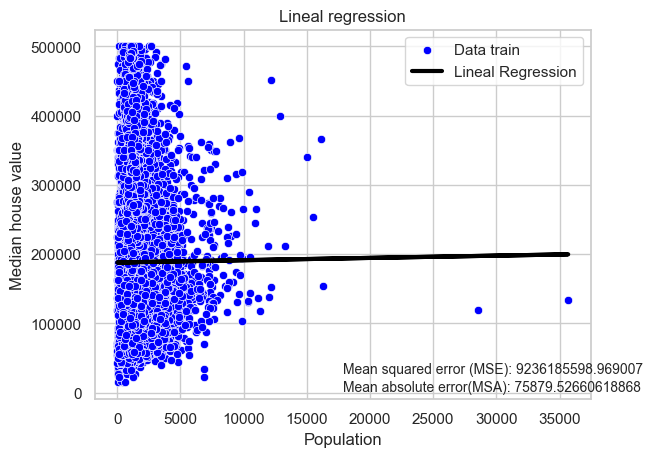

In [30]:

# plot the regression line against the training data
sns.scatterplot(x="population", y="median_house_value", data=train, color="blue", label='Data train')
plt.plot(train[["population"]], model.predict(train[["population"]]), color="black", linewidth=3, label='Lineal Regression')
plt.xlabel('Population')
plt.ylabel('Median house value')
plt.title('Lineal regression')

# Calculate MSE and MAE on the train set
textstr_mse =f"Mean squared error (MSE): {mean_squared_error(train[['median_house_value']], model.predict(train[['population']]))}"
plt.text(0.5, 0.10, textstr_mse, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

textstr_mae =f"Mean absolute error(MSA): {mean_absolute_error(train[['median_house_value']], model.predict(train[['population']]))}"
plt.text(0.5, 0.05, textstr_mae, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

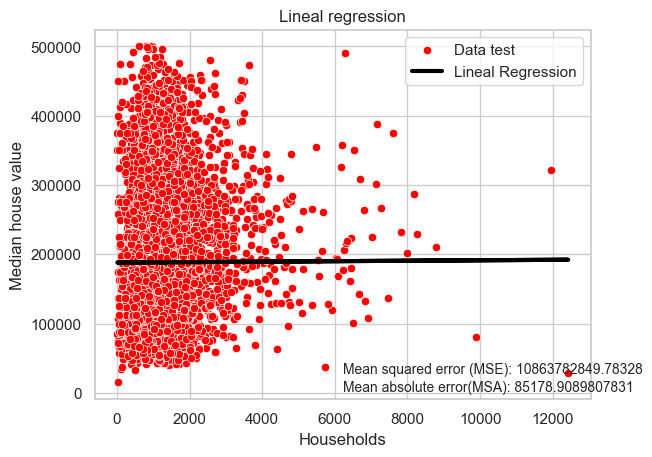

In [31]:
# plot the regression line against the test data
sns.scatterplot(x="population", y="median_house_value", data=test, color="red" , label='Data test')
plt.plot(test[["population"]], model.predict(test[["population"]]), color="black", linewidth=3, label='Lineal Regression')

plt.xlabel('Households')
plt.ylabel('Median house value')
plt.title('Lineal regression')

# Calculate MSE and MAE on the TEST set
textstr_mse =f"Mean squared error (MSE): {mean_squared_error(test[['median_house_value']], model.predict(test[['population']]))}"
plt.text(0.5, 0.10, textstr_mse, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

textstr_mae =f"Mean absolute error(MSA): {mean_absolute_error(test[['median_house_value']], model.predict(test[['population']]))}"
plt.text(0.5, 0.05, textstr_mae, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

# Train the Model --> Households and Median house value

- Trainning the model with train Data

In [32]:
# fit
model.fit(X=train[["households"]], y=train[["median_house_value"]])

LinearRegression()

## Evaluate the Model

For the Train and Test data:

* Print the slope and intercept
* Plot the regression line on top of the scatter plot of the training data and  Mean Squared Error (MSE) and the Mean Absolute Error (MAE)

- Get coefficients

In [33]:
# print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [177147.28853835]
Coefficients: [[22.62572591]]


- Test with data

In [34]:
3000*model.coef_ + model.intercept_

array([[245024.46626433]])

In [35]:
model.predict(X=[[3000],[800],[5000]])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[245024.46626433],
       [195247.86926528],
       [290275.91808165]])

- To make the graph with the training data and calculate MSE and MAE on the train set

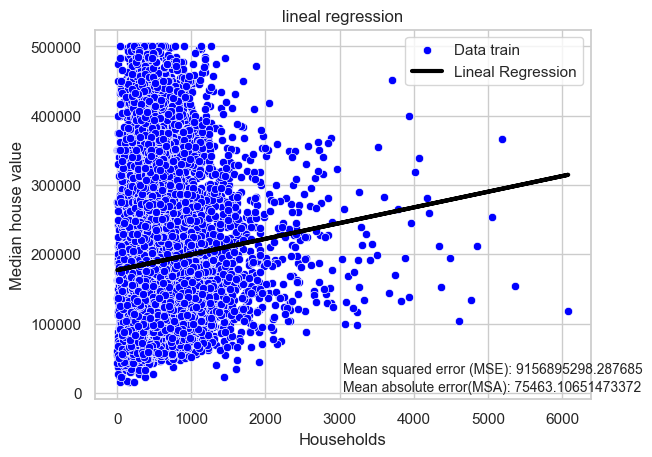

In [36]:
# plot the regression line against the training data
sns.scatterplot(x="households", y="median_house_value", data=train, color="blue", label='Data train')
plt.plot(train[["households"]], model.predict(train[["households"]]), color="black", linewidth=3, label='Lineal Regression')
plt.xlabel('Households')
plt.ylabel('Median house value')
plt.title('lineal regression')

# Calculate MSE and MAE on the train set
textstr_mse =f"Mean squared error (MSE): {mean_squared_error(train[['median_house_value']], model.predict(train[['households']]))}"
plt.text(0.5, 0.10, textstr_mse, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

textstr_mae =f"Mean absolute error(MSA): {mean_absolute_error(train[['median_house_value']], model.predict(train[['households']]))}"
plt.text(0.5, 0.05, textstr_mae, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()

- To make the graph with the test data and calculate MSE and MAE on the test set

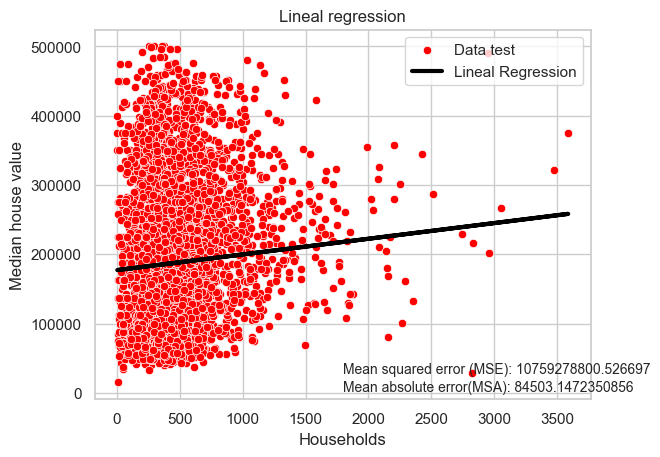

In [37]:
# plot the regression line against the test data
sns.scatterplot(x="households", y="median_house_value", data=test, color="red" , label='Data test')
plt.plot(test[["households"]], model.predict(test[["households"]]), color="black", linewidth=3, label='Lineal Regression')

plt.xlabel('Households')
plt.ylabel('Median house value')
plt.title('Lineal regression')

# Calculate MSE and MAE on the TEST set
textstr_mse =f"Mean squared error (MSE): {mean_squared_error(test[['median_house_value']], model.predict(test[['households']]))}"
plt.text(0.5, 0.10, textstr_mse, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

textstr_mae =f"Mean absolute error(MSA): {mean_absolute_error(test[['median_house_value']], model.predict(test[['households']]))}"
plt.text(0.5, 0.05, textstr_mae, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend()
plt.show()